In [1]:
from __future__ import division, absolute_import, print_function
%load_ext autoreload
%autoreload 2

import os 
print(os.getcwd()) 
    
#import hepran
#import hepran.bzipscore as bz
#import hepran.bcipa as bc
#import hepran.utils as u
#import hepran.registers as r
#import hepran.agadir as ag

import pandas as pd
import numpy as np
import seaborn as sns
    
%matplotlib inline

import matplotlib as mpl
import matplotlib.pylab as plt

import sklearn as sk


CCO = os.environ.get("CCO",r"C:\Projekti_KI\ortoCC\CoiledCoilOrtho")


def getRMSE(x, y, df):
    return np.sqrt(((df[x]-df[y])**2).mean())

D:\data\ortoCC\fine_tune_scoring_function


In [2]:
df = pd.read_excel('data/round0_fiting.xlsx',index_col=[0,1])

In [3]:
df.head(5)
df.columns

Index([u'seq1', u'seq2', u'Tm', u'on_target', u'avg_HP1', u'avg_HP2',
       u'avg_HP_12', u'HP1', u'HP2', u'HP_12', u'c_NN', u'c_IN', u'c_II',
       u'es_EE', u'es_EK', u'es_KK'],
      dtype='object')

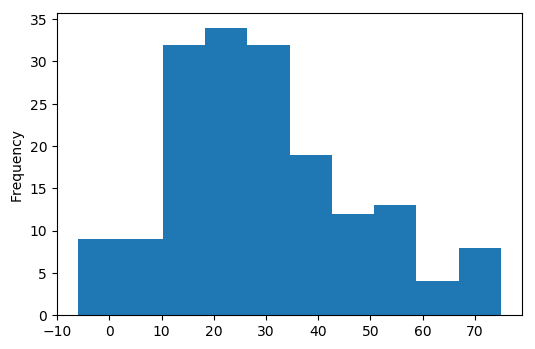

In [4]:
df.Tm.plot.hist()

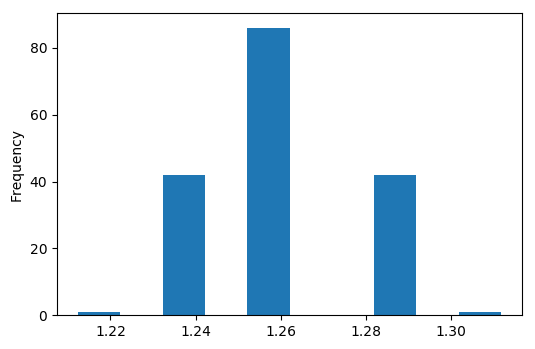

In [51]:
df.avg_HP_12.plot.hist()

In [52]:
df.query('on_target')

,,seq1,seq2,Tm,on_target,avg_HP1,avg_HP2,avg_HP_12,HP1,HP2,HP_12,c_NN,c_IN,c_II,es_EE,es_EK,es_KK
ID1,ID2,,,,,,,,,,,,,,,,
O1,O2,DKNAALKAENAALEYEIAALEAEIAALEG,DENAALEAKNAALKYKIAALKAKIAALKG,72,True,1.286897,1.237241,1.262069,37.32,35.88,73.2,2,0,2,0,8,0
O3,O4,DEIAALEAKIAALKYENAALEAENAALEG,DKIAALKAEIAALEYKNAALKAKNAALKG,68,True,1.286897,1.237241,1.262069,37.32,35.88,73.2,2,0,2,0,8,0
O5,O6,DENAALEAEIAALEYKNAALKAEIAALEG,DKNAALKAKIAALKYENAALEAKIAALKG,71,True,1.286897,1.237241,1.262069,37.32,35.88,73.2,2,0,2,0,8,0
O7,O8,DKIAALKAKNAALKYKIAALKAENAALEG,DEIAALEAENAALEYEIAALEAKNAALKG,68,True,1.237241,1.286897,1.262069,35.88,37.32,73.2,2,0,2,0,8,0
O10,O9,DKNAALKAENAALEYKIAALKAKIAALKG,DENAALEAKNAALKYEIAALEAEIAALEG,69,True,1.237241,1.286897,1.262069,35.88,37.32,73.2,2,0,2,0,8,0
O11,O12,DKIAALKAEIAALEYENAALEAENAALEG,DEIAALEAKIAALKYKNAALKAKNAALKG,73,True,1.286897,1.237241,1.262069,37.32,35.88,73.2,2,0,2,0,8,0
O13,O14,DKNAALKAKIAALKYKNAALKAEIAALEG,DENAALEAEIAALEYENAALEAKIAALKG,75,True,1.237241,1.286897,1.262069,35.88,37.32,73.2,2,0,2,0,8,0
O15,O16,DEIAALEAENAALEYKIAALKAENAALEG,DKIAALKAKNAALKYEIAALEAKNAALKG,52,True,1.286897,1.237241,1.262069,37.32,35.88,73.2,2,0,2,0,8,0
Q1,Q2,DENAALEAKNAALKYKIAALKAEIAALEG,DKNAALKAENAALEYEIAALEAKIAALKG,63,True,1.262069,1.262069,1.262069,36.60,36.60,73.2,2,0,2,0,8,0


In [31]:

#Q = df['HP_12 c_NN c_IN c_II es_EE es_EK es_KK Tm on_target'.split()]
Q = df.query('(Tm > 25)')
print(len(Q))
Q.head()


95


seq1                           seq2  Tm  \
ID1 ID2                                                                     
O1  O2   DKNAALKAENAALEYEIAALEAEIAALEG  DENAALEAKNAALKYKIAALKAKIAALKG  72   
O2  O2   DENAALEAKNAALKYKIAALKAKIAALKG  DENAALEAKNAALKYKIAALKAKIAALKG  34   
    O3   DENAALEAKNAALKYKIAALKAKIAALKG  DEIAALEAKIAALKYENAALEAENAALEG  27   
O3  O4   DEIAALEAKIAALKYENAALEAENAALEG  DKIAALKAEIAALEYKNAALKAKNAALKG  68   
O2  O5   DENAALEAKNAALKYKIAALKAKIAALKG  DENAALEAEIAALEYKNAALKAEIAALEG  30   

         on_target   avg_HP1   avg_HP2  avg_HP_12    HP1    HP2  HP_12  c_NN  \
ID1 ID2                                                                        
O1  O2        True  1.286897  1.237241   1.262069  37.32  35.88  73.20     2   
O2  O2       False  1.237241  1.237241   1.237241  35.88  35.88  71.76     2   
    O3       False  1.237241  1.286897   1.262069  35.88  37.32  73.20     0   
O3  O4        True  1.286897  1.237241   1.262069  37.32  35.88  73.20     2   
O2  O5       False  1.237241  1.286897   1.262069  35.88  37.32  73.20     1   

         c_IN  c_II  es_EE  es_EK  es_KK  
ID1 ID2                                   
O1  O2      0     2      0      8      0  
O2  O2      0     2      2      0      6  
    O3      4     0      2      4      2  
O3  O4      0     2      0      8      0  
O2  O5      2     1      2      4      2

In [47]:
import sklearn
from sklearn import linear_model


Y=Q['Tm']
X=Q['c_NN c_IN c_II es_EE es_EK es_KK avg_HP_12'.split()] 
lm = linear_model.Ridge(normalize=False, alpha=0.003)
lm.fit(X, Y)
#lm.coef_ = [70, 5, -5, 5, -5, 5, -5]
#lm.intercept_=20
lm.fit(X, Y)

Ridge(alpha=0.003, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [48]:
print(lm.intercept_)
pd.DataFrame(zip(X.columns, lm.coef_), columns="feature coef".split())


38.2141830848


,feature,coef
0,c_NN,1.276493
1,c_IN,-2.552985
2,c_II,1.276493
3,es_EE,-0.504971
4,es_EK,2.072360
5,es_KK,-1.567389
6,avg_HP_12,0.006594


In [49]:
Q['Tm_pred'] = lm.predict(X)


C:\bin\python\anaconda\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


0.434972681966


10.069962943047587

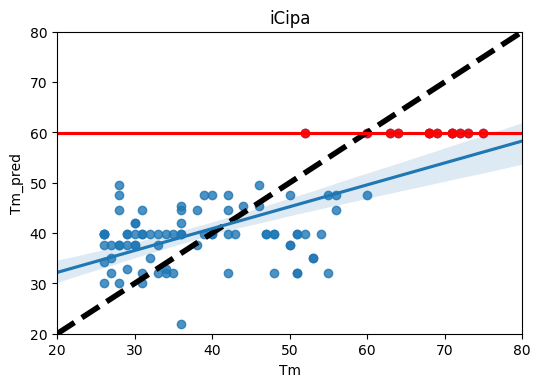

In [50]:
plt.plot([20,80], [20,80], 'k--', lw=4)
plt.title('iCipa')
plt.ylim([20,80])
plt.xlim([20,80])
print(lm.score(X,Y))
sns.regplot(x='Tm', y='Tm_pred', fit_reg=True, data=Q)
sns.regplot(x='Tm', y='Tm_pred', fit_reg=True, data=Q.query('on_target'), color='red')

getRMSE('Tm', 'Tm_pred', Q)

0.573730493344


C:\bin\python\anaconda\lib\site-packages\ipykernel\__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


8.7465197818318448

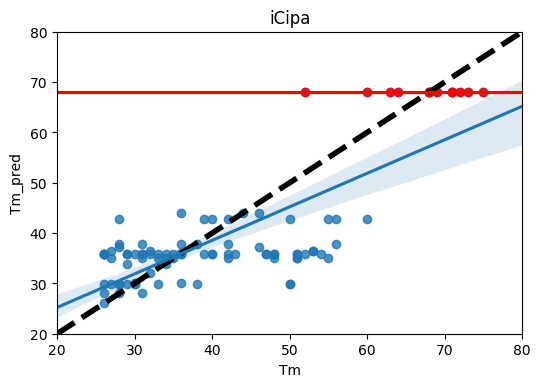

In [45]:
from sklearn.svm import SVR
Y=Q['Tm']
X=Q['c_NN c_IN c_II es_EE es_EK es_KK'.split()] 
lm = SVR(kernel='rbf', C=1e3, gamma=0.1)
lm.fit(X, Y)
#lm.coef_ = [70, 5, -5, 5, -5, 5, -5]
#lm.intercept_=20
lm.fit(X, Y)
Q['Tm_pred'] = lm.predict(X)
plt.plot([20,80], [20,80], 'k--', lw=4)
plt.title('iCipa')
plt.ylim([20,80])
plt.xlim([20,80])
print(lm.score(X,Y))
sns.regplot(x='Tm', y='Tm_pred', fit_reg=True, data=Q)
sns.regplot(x='Tm', y='Tm_pred', fit_reg=True, data=Q.query('on_target'), color='red')

getRMSE('Tm', 'Tm_pred', Q)
